In [3]:
from paraview.simple import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

In [4]:
# Case files
angles = ['05', '10', '15', '20', '25', '30']
folder = [f'Theta_{angle}/case.foam' for angle in angles]

# Properties of interest with geometry storage
properties = ['Ma', 'T', 'p', 'U']
store_files = ['Ma.png', 'T.png', 'p.png', 'U.png']

# Lineplot points
csv_files = [f'Figures/Theta_{angle}/lineplot.csv' for angle in angles]
Point1 = [0.5, 0.0, 1.0]
EPS = 1e-3
Point2_y = [0.091, 0.182, 0.273, 0.364, 0.455, 0.546]
Point2_vec = [[1.5, point2+EPS, 1.0] for point2 in Point2_y]

# Plotting settings
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

In [5]:
# Load your case.foam file
foamCase = [OpenFOAMReader(FileName=folder_) for folder_ in folder]

# Update pipeline to read the time steps, etc.
[foamCase_.UpdatePipeline() for foamCase_ in foamCase]

[None, None, None, None, None, None]

In [6]:
# renderView = GetActiveViewOrCreate('RenderView')

In [7]:
def store_geometry(foamCase, property, store_file):
    # Create a geometry view and show the data
    renderView = GetActiveViewOrCreate('RenderView')
    display = Show(foamCase, renderView)

    # Set properties to color by Mach number
    ColorBy(display, ('POINTS', property))
    display.RescaleTransferFunctionToDataRange(True)
    display.SetScalarBarVisibility(renderView, True)

    # Set the color map
    lut = GetColorTransferFunction('Ma')
    lut.ApplyPreset('Cool to Warm', True)
    display.SetRepresentationType('Surface')
    display.SetScalarBarVisibility(renderView, True)

    # Set the camera
    # Reset the camera to what would be the default in ParaView
    ResetCamera()
    # Apply camera parallel projection (orthographic view)
    renderView.CameraParallelProjection = 1
    # Show the orientation axes for better spatial reference
    renderView.OrientationAxesVisibility = 1
    # Set the background color to white
    renderView.Background = [1.0, 1.0, 1.0]
    # Set the view size
    LoadPalette('WhiteBackground')
    renderView.ViewSize = [600, 600]

    # Store a figure
    if store_file is not None:
        SaveScreenshot(store_file, renderView, magnification=2, quality=100)

    # delete the display object
    Delete(display)
    # delete the render view
    Delete(renderView)

In [8]:
# # Loop over different geometries
# for i, foamCase_ in tqdm(enumerate(foamCase)):
#     # Set the active source to the current foamCase
#     # Loop through each property and store the geometry
#     store_file = f'Figures/Theta_{angles[i]}'
#     # print(f'store_file: {store_file}')
#     for property, store_file_ in zip(properties, store_files):
#             store_file_ = f'{store_file}/{store_file_}'
#             # print(f'store_file_: {store_file_}')
#             store_geometry(foamCase_, property, store_file_)

In [9]:
def store_lineplot(foamCase, Point1, Point2, store_file):
    renderView = GetActiveViewOrCreate('RenderView')
    
    # Extract properties along a line
    lineSource = PlotOverLine(Input=foamCase)
    lineSource.Point1 = Point1
    lineSource.Point2 = Point2
    lineDisplay = Show(lineSource, renderView)
    lineDisplay.UpdatePipeline()

    # Render the view
    Render()

    # Make sure directory exists before saving
    store_dir = os.path.dirname(store_file)
    if store_dir and not os.path.exists(store_dir):
        os.makedirs(store_dir, exist_ok=True)
    
    # Add file extension if not present
    if not store_file.endswith('.csv'):
        store_file = store_file + '/lineplot.csv'
    
    # Save the line plot
    SaveData(store_file, proxy=lineSource)

    # Clean up
    Delete(lineSource)
    Delete(lineDisplay)
    Delete(renderView)

In [10]:

# # Example: Extract properties along a line
# lineSource = PlotOverLine(Input=foamCase)
# lineSource.Point1 = [0.5, 0.0, 1.0]
# lineSource.Point2 = [1.5, 0.091, 1.0]
# lineDisplay = Show(lineSource, renderView)
# lineDisplay.UpdatePipeline()

# # Render the view
# Render()

# # Save the line plot
# SaveData('line_plot.csv', proxy=lineSource)


In [11]:
# store_lineplot(foamCase, [0.5, 0.0, 1.0], [1.5, 0.091, 1.0], 'lineplot.csv')
folder, Point2_vec, angles

(['Theta_05/case.foam',
  'Theta_10/case.foam',
  'Theta_15/case.foam',
  'Theta_20/case.foam',
  'Theta_25/case.foam',
  'Theta_30/case.foam'],
 [[1.5, 0.092, 1.0],
  [1.5, 0.183, 1.0],
  [1.5, 0.274, 1.0],
  [1.5, 0.365, 1.0],
  [1.5, 0.456, 1.0],
  [1.5, 0.547, 1.0]],
 ['05', '10', '15', '20', '25', '30'])

In [12]:
# Loop over different geometries
for i, foamCase_ in tqdm(enumerate(foamCase)):
    store_lineplot(foamCase_, Point1, Point2_vec[i], csv_files[i])

6it [00:00,  7.52it/s]


In [13]:
# Load the line plot data
df = [pd.read_csv(csv_file) for csv_file in csv_files]

In [14]:
df[0].head()

,Ma,T,U:0,U:1,U:2,p,vtkValidPointMask,arc_length,Points:0,Points:1,Points:2
0,1.8746,317.19,672.44,6.9061,2.854400e-18,116400.0,1,0.000000,0.500,0.000000,1
1,1.8731,317.40,672.09,7.1577,2.854700e-18,116730.0,1,0.001004,0.501,0.000092,1
2,1.8715,317.61,671.74,7.4094,2.855100e-18,117070.0,1,0.002008,0.502,0.000184,1
3,1.8700,317.83,671.39,7.6610,2.855400e-18,117400.0,1,0.003013,0.503,0.000276,1
4,1.8685,318.04,671.03,7.9128,2.855800e-18,117730.0,1,0.004017,0.504,0.000368,1


<Axes: >

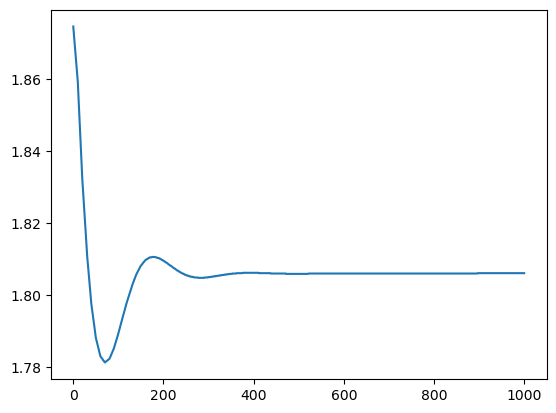

In [17]:
df[0]['Ma'].plot()

In [16]:
df[0]['Points:0'].values

array([0.5  , 0.501, 0.502, ..., 1.498, 1.499, 1.5  ], shape=(1001,))

In [23]:
def plot_all_geometries(df, entry, angles, xlabel, ylabel, title, savefig=None, colors=colors):
    fig, axs = plt.subplots()
    for i, df_ in enumerate(df):
        value = df_[entry].values
        xaxis = df_['Points:0'].values
        axs.plot(xaxis, value, color=colors[i], label=f'$\Theta$ = {angles[i]}')
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    fig.suptitle(title)
    axs.legend()
    axs.grid()
    fig.tight_layout()
    if savefig is not None:
        fig.savefig(savefig, dpi=300)
    fig.show()

<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_91721/4012935693.py:6: SyntaxWarning: invalid escape sequence '\T'
  axs.plot(xaxis, value, color=colors[i], label=f'$\Theta$ = {angles[i]}')


/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_91721/4012935693.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_91721/4012935693.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/v_/5q1gkdc53z34pdsfnpkx2t340000gn/T/ipykernel_91721/4012935693.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


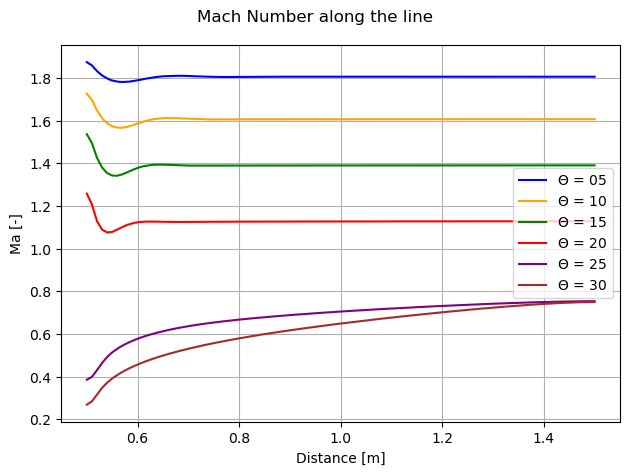

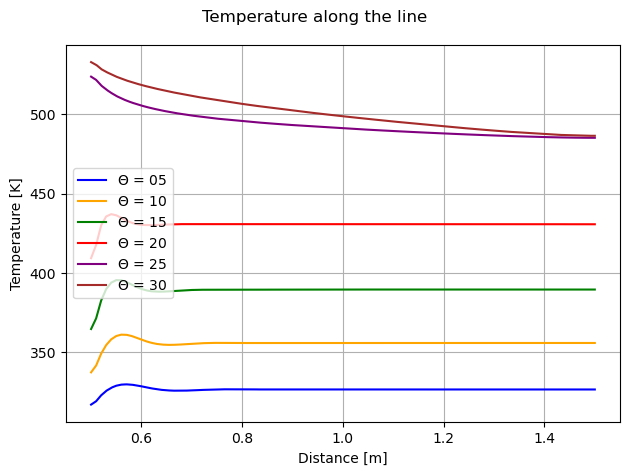

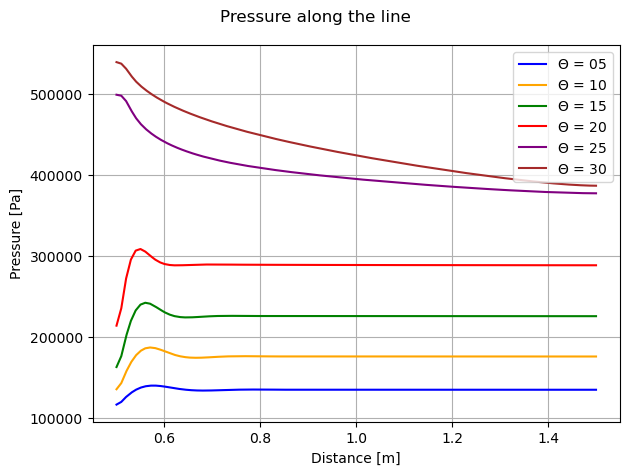

In [24]:
ylabels = [
    'Ma [-]', 
    'Temperature [K]', 
    'Pressure [Pa]', 
    # 'Velocity'
]
Title = [
    'Mach Number along the line', 
    'Temperature along the line', 
    'Pressure along the line', 
    # 'Velocity along the line'
]
for prop, ylab, titl in zip(properties, ylabels, Title):
    savefig = f'Figures/LinePlots/{prop}.pdf'
    plot_all_geometries(
        df=df, 
        entry=prop, 
        angles=angles, 
        xlabel='Distance [m]',
        ylabel=ylab, 
        title=titl, 
        savefig=savefig
    )

In [22]:
foamCase_current = foamCase[0]

# Create a residual view to visualize convergence history
renderView = GetActiveViewOrCreate('RenderView')
SetActiveSource(foamCase_current)

# Get the available time steps
timeSteps = foamCase_current.TimestepValues

# Create structures to store residual data
residuals = {}
for prop in properties:
    residuals[prop] = {'avg': [], 'min': [], 'max': []}

# Loop through time steps to extract residual data
for time in timeSteps:
    foamCase_current.UpdatePipeline(time)
    
    # Extract data for each property
    for prop in properties:
        # Get data for the current property at this time step
        dataInfo = foamCase_current.GetDataInformation().GetPointDataInformation().GetArrayInformation(prop)
        if dataInfo:
            residuals[prop]['avg'].append(dataInfo.GetComponentMean(0))
            residuals[prop]['min'].append(dataInfo.GetComponentRange(0)[0])
            residuals[prop]['max'].append(dataInfo.GetComponentRange(0)[1])

# Plot residual history
fig, axs = plt.subplots(len(properties), 1, figsize=(10, 12), sharex=True)

for i, prop in enumerate(properties):
    times = np.arange(len(residuals[prop]['avg']))
    axs[i].plot(times, residuals[prop]['avg'], 'b-', label='Average')
    axs[i].plot(times, residuals[prop]['min'], 'g--', label='Minimum')
    axs[i].plot(times, residuals[prop]['max'], 'r--', label='Maximum')
    axs[i].set_ylabel(f'{prop}')
    axs[i].grid(True)
    axs[i].legend()

axs[-1].set_xlabel('Time Step')
fig.suptitle('Property Residuals Over Time')
fig.tight_layout()
plt.savefig('Figures/residuals.pdf', dpi=300)
plt.show()

AttributeError: 'paraview.modules.vtkRemotingCore.vtkPVArrayInformation' object has no attribute 'GetComponentMean'